In [23]:
import io
import time
import pandas as pd
from google.colab import files
from sklearn.linear_model import LinearRegression
uploaded = files.upload()

Saving jobs_data_cleaned.csv to jobs_data_cleaned (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['jobs_data_cleaned.csv']), index_col=None)


In [0]:
def title_simplifier(title):
  if "data scientist" in title.lower():
    return "data scientist"
  elif "data engineer" in title.lower():
    return "data engineer"
  elif "analyst" in title.lower():
    return "analyst"
  elif "machine learning" in title.lower():
    return "mle"
  elif "manager" in title.lower():
    return "manager"
  elif "director" in title.lower():
    return "director"
  else:
    "na"

def seniority(title):
  if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
    return "senior"
  elif "jr" in title.lower() or "jr." in title.lower():
    return "jr"
  else:
    return "na"

In [0]:
  df['job_simp'] = df['Job Title'].apply(title_simplifier)
  df['seniority'] = df['Job Title'].apply(seniority)

In [0]:
df.job_state.value_counts()
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "los angeles" else "CA")

In [0]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(",")) if x != "-1" else 0)

In [29]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [0]:
df.describe()

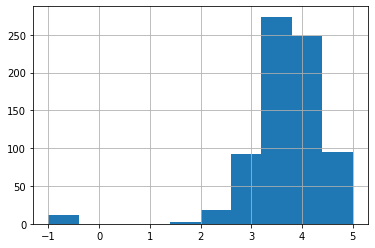

In [37]:
df.Rating.hist()

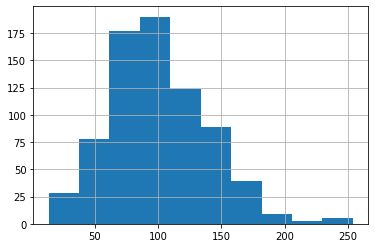

In [38]:
df.avg_salary.hist()

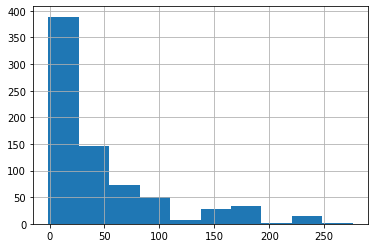

In [39]:
df.age.hist()

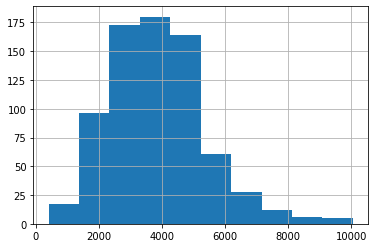

In [40]:
df.desc_len.hist()

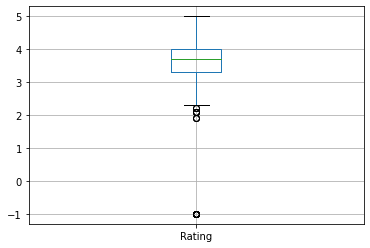

In [48]:
df.boxplot(column = ['Rating'])

In [51]:
corr1 = df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()
corr1

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


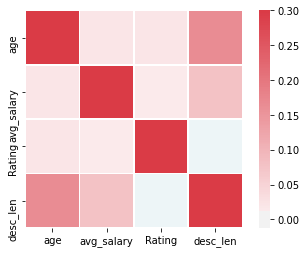

In [54]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1, vmax=.3, center=0, square=True, linewidths=.5, cmap=cmap)

In [0]:
df.columns

In [0]:
df_cat = df[['Location', "Headquarters", 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R_yn', 'spark_yn', 'aws', 'excel', 'job_simp',
       'seniority']]

In [0]:
import matplotlib.pyplot as plt

for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()
  print("Graph for %s: totel = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

Graph for Location: totel = 17


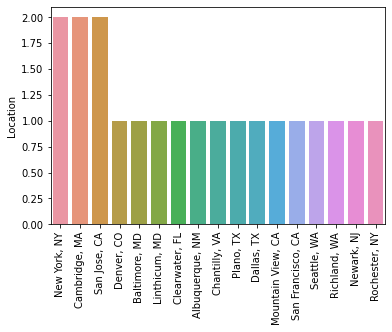

Graph for Headquarters: totel = 16


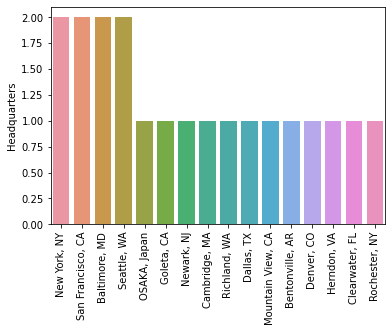

Graph for company_txt: totel = 20


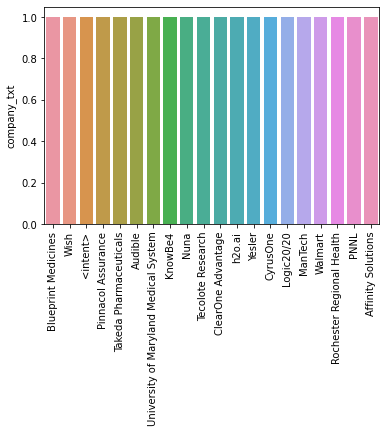

In [78]:
for i in ['Location', 'Headquarters', 'company_txt']:
  cat_num = df_cat[i][:20].value_counts()
  print("Graph for %s: totel = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.show()

In [79]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818


In [80]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429

In [86]:
pd.pivot_table(df, index='job_state', values="avg_salary").sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
Bellevue,184.5000
Lake Forest,179.5000
Mountain View,177.1875
Novato,168.0000
Burbank,164.0000
...,...
Millville,27.5000
Lewes,27.5000
Burleson,21.5000


In [90]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending=True)

avg_salary
job_state           job_simp                  
Agoura Hills        data engineer            1
Albuquerque         data scientist           3
Alexandria          analyst                  2
Aliso Viejo         data engineer            2
Allentown           manager                  2
Ann Arbor           data scientist           1
Arlington           data engineer            1
                    data scientist           1
Armonk              data scientist           3
Arvada              data scientist           1
Ashburn             data scientist           1
Atlanta             data scientist           4
Aurora              mle                      1
Austin              data engineer            5
                    data scientist           3
Baltimore           analyst                  1
                    data scientist           2
Bedford             data scientist           2
Bellevue            data scientist           2
Birmingham          data engineer            1
Bloomington         data engineer            1
Blue Bell           analyst                  2
Boise               analyst                  1
Boston              data scientist           7
                    director                 3
                    manager                  2
Brisbane            data scientist           1
Burbank             data scientist           4
CA                  data engineer            1
                    data scientist           3
Cambridge           data engineer            6
                    data scientist          10
                    director                 3
                    manager                  1
Carle Place         data scientist           1
Cedar Rapids        analyst                  2
Chandler            data engineer            2
Chantilly           data engineer            3
                    data scientist           3
Charlotte           data scientist           2
                    data engineer            4
Charlottesville     data scientist           2
Chattanooga         data engineer            1
Cherry Hill         analyst                  1
Chicago             analyst                  3
                    data engineer            7
                    data scientist          13
                    director                 5
                    mle                      2
Cincinnati          data scientist           5
Clearwater          analyst                  2
                    data scientist           2
Coraopolis          data scientist           2
Corvallis           data engineer            1
Cupertino           data scientist           2
Dallas              data scientist           6
Dayton              analyst                  1
Dearborn            manager                  2
Denver              data engineer            3
                    data scientist           2
Des Moines          data engineer            2
Detroit             data scientist           2
Dublin              analyst                  2
Durham              data engineer            2
Emeryville          data scientist           1
Ewing               manager                  2
Exton               analyst                  2
Fort Belvoir        data scientist           2
                    mle                      2
Fort Lauderdale     data scientist           2
Fort Lee            data scientist           1
                    director                 2
Fort Worth          data scientist           1
Foster City         data scientist           1
Framingham          data scientist           1
Franklin            data engineer            2
Frederick           data scientist           2
Fremont             data scientist           2
Gaithersburg        data scientist           3
Glen Burnie         analyst                  1
Green Bay           analyst                  2
Groton              data scientist           2
Hamilton            analyst                  2
Harrisburg          analyst              

In [92]:
# Average salary for data scientist in all the states
pd.pivot_table(df[df.job_simp == "data scientist"], index='job_state', values = 'avg_salary').sort_values('avg_salary', ascending = True)

,avg_salary
job_state,
Port Washington,15.500000
Bedford,69.500000
Phoenix,69.500000
Baltimore,73.500000
Albuquerque,74.333333
Carle Place,76.500000
Richland,76.650000
Peoria,81.000000
Atlanta,81.125000
